# Purpose
The purpose of this model is to apply data science techniques to the dataset and demonstrate the abilities to clean, transform, analyze, and model data.<br>
<br>
<br>
**What to expect:**<br>
Loading data<br>
Analyzing the data structure<br>
Analyzing values<br>
Analyzing unique values<br>
Exploratory data analysis<br>
Data visualization<br>
Machine Learning Modeling<br>
Handling values that are otherwise consider null values

### About the data:
<br>
Pima Indians Dataset<br>
This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within five years.<br>
The different features in the dataset are Pregnancies, Plasma glucose, Blood pressure, Skin thickness, Insulin test, BMI(Body Mass Index), Diabetes pedigree, Age, and Outcome class.<br>

### Goal of the Modeling
<br>
The goal of the machine learning model at the end will be to create a predictive model that can predict if a person based off the Pima Indians Dataset will develop diabeties.  This model could be useful for medical interventions to help Pima Indian patients reduce the outcome of diabeties.  This demonstration can have futher implications as these techniques can be applied to other medical disease analysis and aid in medical interventions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import itertools

In [2]:
df1 = pd.read_csv('C:\\Users\\JB\\PracPythonCoding\\Full Stack Data Scientist Bootcamp\\02 Python Dataset\\datasets\\pima-indians-diabetes.csv')

In [3]:
df1.head()

,pregnant,glucose,bp,skintest,insulin,bmi,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
col = df1.columns

# Values Analysis

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skintest  768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedi      768 non-null    float64
 7   age       768 non-null    int64  
 8   class     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**All columns are numeric vaues as they should be**

In [6]:
df1.isnull().sum()

pregnant    0
glucose     0
bp          0
skintest    0
insulin     0
bmi         0
pedi        0
age         0
class       0
dtype: int64

### Finding the Max and Min of each column to get an idea of how unusual the values are

**For instance, Glucose, BP, Skin Test, Insulin, and BMI should not have zero values, but there are many zero values.<br>
This will impact out machine learning model.  We need to remove or transform those zero values.**

In [7]:
df1.describe()

,pregnant,glucose,bp,skintest,insulin,bmi,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
for i in col:
    print('________Column: {}______'.format(i))
    print(df1[i].sort_values().head())
    print(df1[i].sort_values().tail())
    print('________________________')

________Column: pregnant______
467    0
109    0
452    0
449    0
448    0
Name: pregnant, dtype: int64
357    13
298    14
455    14
88     15
159    17
Name: pregnant, dtype: int64
________________________
________Column: glucose______
75     0
502    0
349    0
342    0
182    0
Name: glucose, dtype: int64
228    197
408    197
8      197
561    198
661    199
Name: glucose, dtype: int64
________________________
________Column: bp______
347    0
494    0
222    0
81     0
78     0
Name: bp, dtype: int64
549    110
43     110
177    110
691    114
106    122
Name: bp, dtype: int64
________________________
________Column: skintest______
686    0
201    0
683    0
578    0
207    0
Name: skintest, dtype: int64
86     54
120    56
57     60
445    63
579    99
Name: skintest, dtype: int64
________________________
________Column: insulin______
0      0
443    0
440    0
439    0
438    0
Name: insulin, dtype: int64
409    579
584    600
247    680
228    744
13     846
Name: insulin, dt

**There are zero values in some of the columns which does not make sense considering they are medical readings.  There is a possibility that the true values were not recorded. Glucose, BP, Skin Test, Insulin, and BMI should have values besides zero.**

## Unique Values Analysis

In [9]:
for i in col:
    if len(df1[i].unique()) < 20:
        print('The unique values for column **{}** are: {}'.format(i,df1[i].unique()))
        print("The number of unique values in column **{}** are: {}".format(i,len(df1[i].unique())))
        print('')
    else:
        print("The number of unique values in column **{}** are: {}".format(i,len(df1[i].unique())))
        print('')

The unique values for column **pregnant** are: [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
The number of unique values in column **pregnant** are: 17

The number of unique values in column **glucose** are: 136

The number of unique values in column **bp** are: 47

The number of unique values in column **skintest** are: 51

The number of unique values in column **insulin** are: 186

The number of unique values in column **bmi** are: 248

The number of unique values in column **pedi** are: 517

The number of unique values in column **age** are: 52

The unique values for column **class** are: [1 0]
The number of unique values in column **class** are: 2



**Pregnant column can be treated as a categorical column and use dummy variables but having that many levels can be problematic for small sample sizes**

# EDA

array([[<AxesSubplot:title={'center':'pregnant'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'bp'}>],
       [<AxesSubplot:title={'center':'skintest'}>,
        <AxesSubplot:title={'center':'insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'pedi'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'class'}>]], dtype=object)

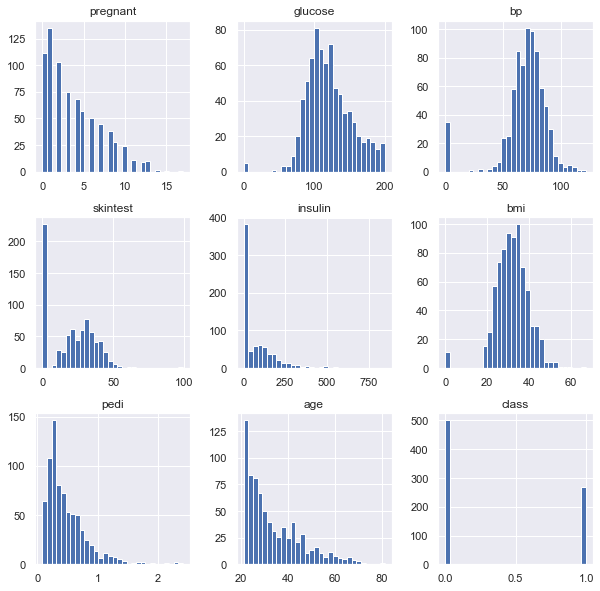

In [10]:
df1.hist(figsize=(10,10), bins=30)

**There is a unbalance of outcomes for the target class / dependent variable for 0**

## Target Class Analysis

In [11]:
df1['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

**This represents the percentage of people without diabetes in the sample data**

In [12]:
df1['class'].value_counts()[0]/df1['class'].count()*100

65.10416666666666

**This represents the percentage of people with diabetes in the sample data**

In [13]:
df1['class'].value_counts()[1]/df1['class'].count()*100

34.89583333333333

**This unbalance in the target class will bias our model.  Maybe some of the zero value columns that have a target class of 0 can be removed to imporve the model**

In [14]:
col1 = ['glucose', 'bp', 'skintest', 'insulin', 'bmi']
for i in col1:
    print('________________________________________{}________________________________________'.format(i))
    print(df1[(df1[i]==0) & (df1['class']==0)])
    print('________________________________________________________________________________')

________________________________________glucose________________________________________
     pregnant  glucose  bp  skintest  insulin   bmi   pedi  age  class
75          1        0  48        20        0  24.7  0.140   22      0
182         1        0  74        20       23  27.7  0.299   21      0
342         1        0  68        35        0  32.0  0.389   22      0
________________________________________________________________________________
________________________________________bp________________________________________
     pregnant  glucose  bp  skintest  insulin   bmi   pedi  age  class
7          10      115   0         0        0  35.3  0.134   29      0
49          7      105   0         0        0   0.0  0.305   24      0
60          2       84   0         0        0   0.0  0.304   21      0
81          2       74   0         0        0   0.0  0.102   22      0
172         2       87   0        23        0  28.9  0.773   25      0
222         7      119   0         0  

**Insulin and Skin Test have the most zero values where target class is also 0**

**Below in the heatmap, you can see that Glucose and BMI are correlated with the target class.  Is this because they have less zero values in their respective columns?  It will be interesting to run this model with some of the zero values dropped or replaced to see if there is an imporvement in the models predictibility**

<AxesSubplot:>

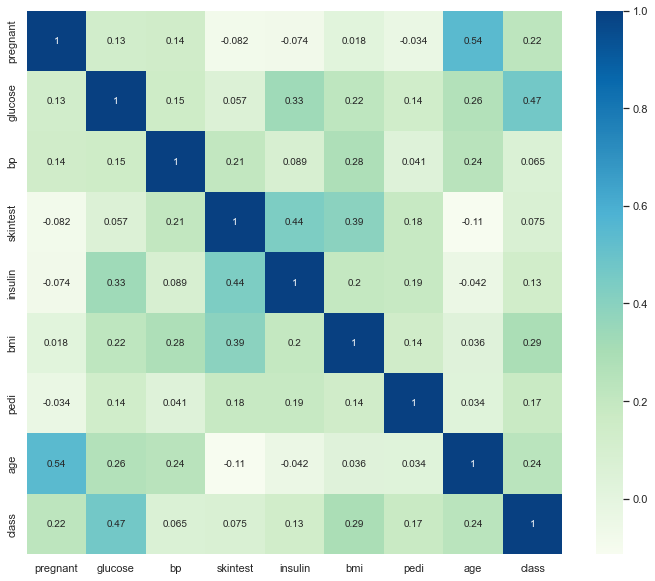

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(), annot=True, cmap='GnBu')

**No significant concern for multicollinearity**

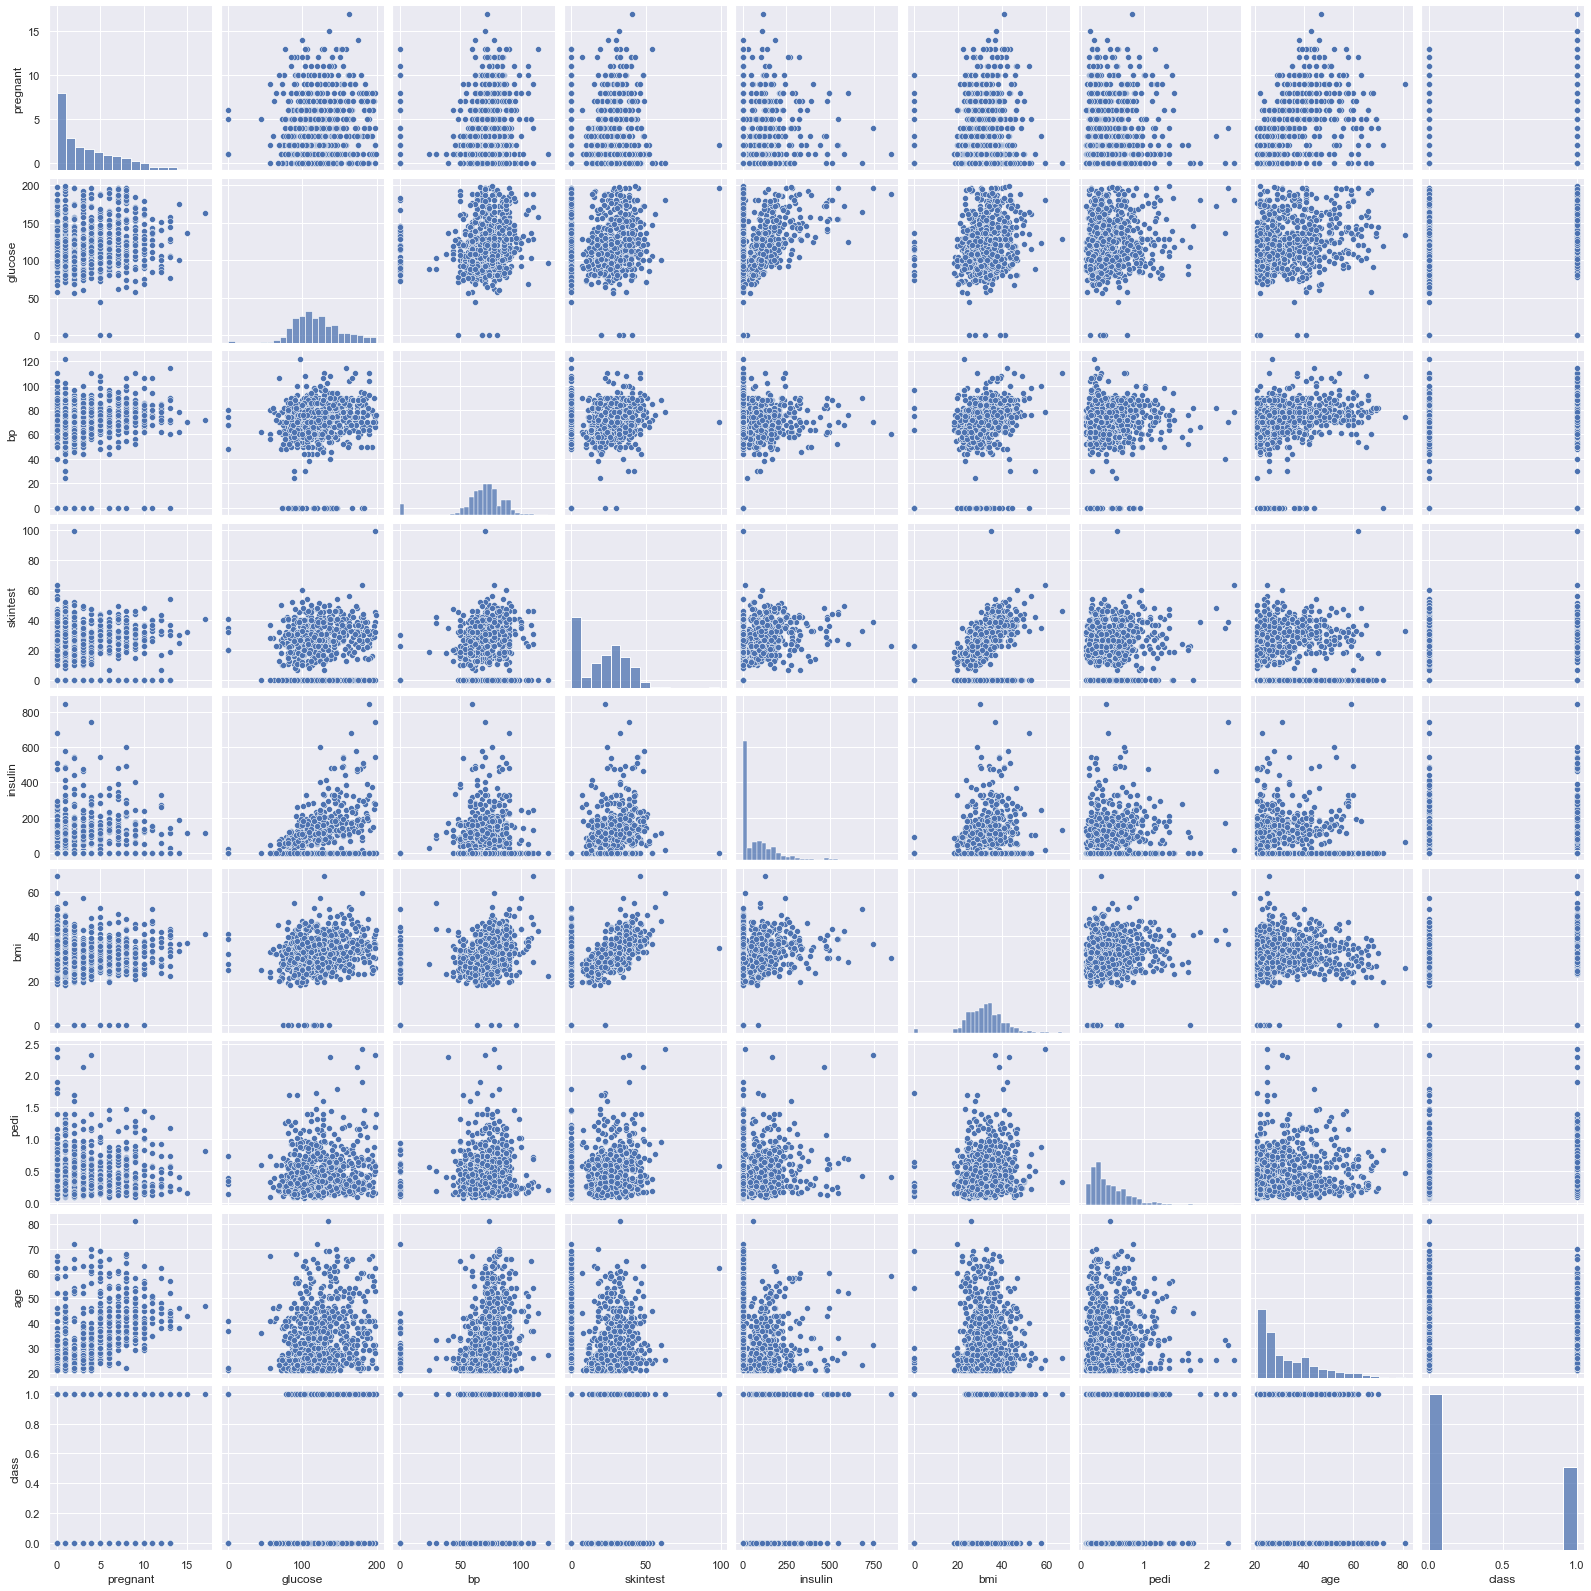

In [16]:
sns.pairplot(df1)

# Modeling

### Splitting the data

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [18]:
df1.head()

,pregnant,glucose,bp,skintest,insulin,bmi,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
X = df1.drop('class', axis=1)
y = df1['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)

### The Model

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log = LogisticRegression(max_iter=1000)
log.fit(X_train,y_train)
y_pred = log.predict(X_test)

### The Results

In [22]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       148
           1       0.78      0.55      0.65        83

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.75       231
weighted avg       0.78      0.78      0.77       231

[[135  13]
 [ 37  46]]


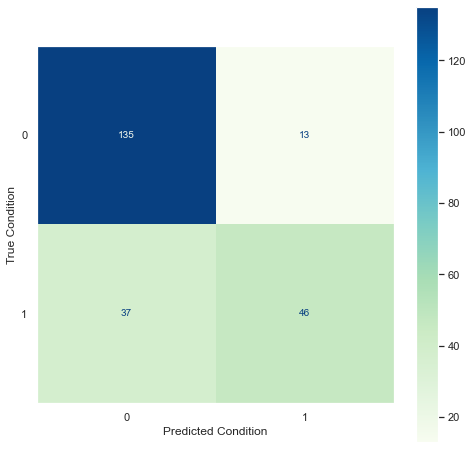

In [23]:
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(include_values=True, cmap='GnBu', ax=ax)
cmd.ax_.set(xlabel='Predicted Condition', ylabel='True Condition', autoscale_on=True)
plt.grid(visible=None)

# Alternative Model 1

## Handling the zero values with averages

In [24]:
from sklearn.impute import SimpleImputer

In [25]:
replace0 = SimpleImputer(missing_values=0, strategy='mean')

In [26]:
X = df1.drop('class', axis=1)
y = df1['class']

### Fitting and Transfroming the 0 Values Into Means of Their Respective Columns

In [27]:
Xcol = X.columns
X = replace0.fit_transform(X)
X = pd.DataFrame(X, columns=Xcol)

### Notice the Insulin column in the X dataframe compared to the original dataframe.  The zeros are replaced with the average of that feature column

In [28]:
X.head()

,pregnant,glucose,bp,skintest,insulin,bmi,pedi,age
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0


In [29]:
df1.head()

,pregnant,glucose,bp,skintest,insulin,bmi,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)

## The Model and Results

In [31]:
log = LogisticRegression(max_iter=1000)
log.fit(X_train,y_train)
y_pred = log.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       148
           1       0.75      0.58      0.65        83

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231

[[132  16]
 [ 35  48]]


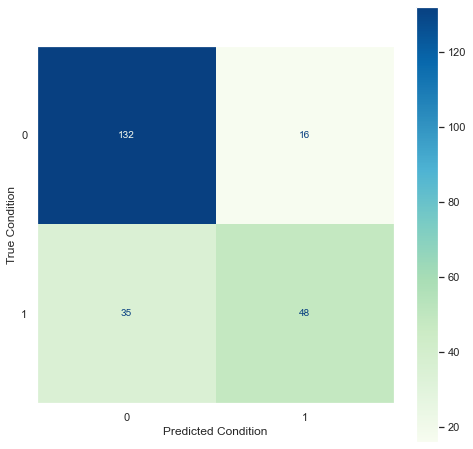

In [32]:
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(include_values=True, cmap='GnBu', ax=ax)
cmd.ax_.set(xlabel='Predicted Condition', ylabel='True Condition', autoscale_on=True)
plt.grid(visible=None)

# Alternative Model 2

## Removing some of the zero values 

#### Filtering out rows where Insulin and Skin Test equal 0 for the target class of 0 because target class 0 is over represented and Insulin and Skin Test for the target class of 0 has many zero values that are not contributing to the model

In [33]:
df1['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [34]:
500-268

232

In [35]:
df1[ (df1['insulin']==0) & (df1['skintest']==0) & (df1['class']==0)].index

Int64Index([  5,   7,  10,  12,  21,  29,  33,  36,  41,  44,
            ...
            697, 699, 703, 714, 724, 728, 729, 734, 758, 762],
           dtype='int64', length=139)

In [36]:
df2 = df1.drop(df1[ (df1['insulin']==0) & (df1['skintest']==0) & (df1['class']==0)].index, axis=0)

In [37]:
df2.head()

,pregnant,glucose,bp,skintest,insulin,bmi,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Now the target classes are more balanced

In [38]:
df2['class'].value_counts()

0    361
1    268
Name: class, dtype: int64

<AxesSubplot:>

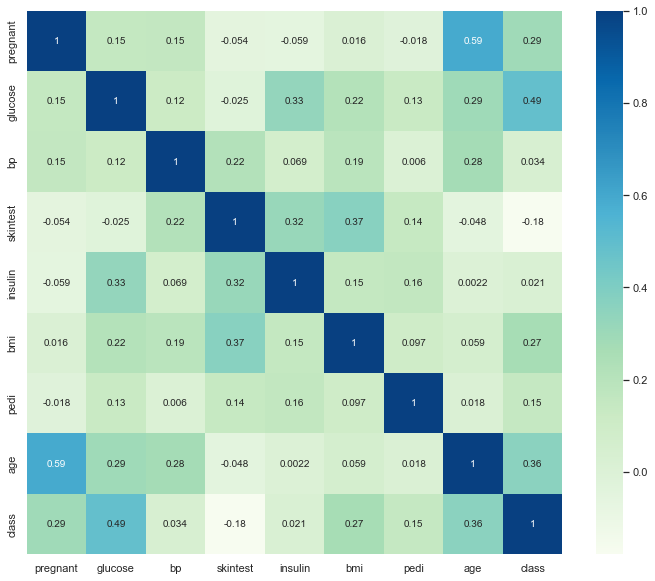

In [39]:
plt.figure(figsize=(12,10))
sns.heatmap(df2.corr(), annot=True, cmap='GnBu')

**Removing some of the zero values did not improve correlation amongst Skin Test and Insulin that was hypothized earlier but the model did  imporved as shown below**

### The Model and Results

In [40]:
X = df2.drop('class',axis=1)
y = df2['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)

log = LogisticRegression(max_iter=1000)
log.fit(X_train,y_train)

y_pred = log.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       123
           1       0.76      0.76      0.76        66

    accuracy                           0.83       189
   macro avg       0.81      0.81      0.81       189
weighted avg       0.83      0.83      0.83       189

[[107  16]
 [ 16  50]]


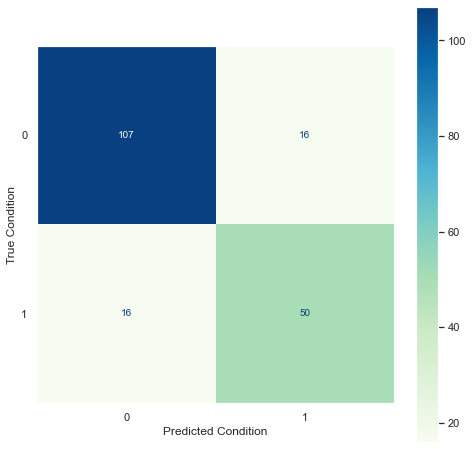

In [41]:
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(include_values=True, cmap='GnBu', ax=ax)
cmd.ax_.set(xlabel='Predicted Condition', ylabel='True Condition', autoscale_on=True)
plt.grid(visible=None)

# Conclusion

**The Original Logistic Regression Model:**
Accuracy: 78%<br>
False Positives: 37<br>
False Negatives:13<br>
This model took the data as is.<br>
<br>
<br>
**The Alternative Logistic Regression Model # 1:**
Accuracy: 78%<br>
False Positives: 35<br>
False Negatives:16<br>
This model replaced the zero values with the feature's average but shown insignificant improvements.<br>
<br>
<br>
**The Alternative Logistic Regression Model # 2:**
Accuracy: 83%<br>
False Positives: 16<br>
False Negatives:16<br>
This model removed zero values where the Insulin was zero and Skin Test was zero for the target class of 0.  The target class of 0 was over biased with 500 instances.  The target class of 1 had 268 intances.  After removing the previously mentioned zero values, it brought the target class of 0 down to 361 and target class of 1 remained at 268. Overall, this model improved the outcome and removed the bias towards the target class 0, but at the expense of reducing the sample size.  Examining the confusion matrix will show that the false positves were reduced from 35 to 37 down to 16.  This demonstrates the reduction of bias in the model.